# Base de données d'animaux

## Générer le dataframe

Utilise panda pour générer une dataframe à partir du fichier en utilisant les tab comme séparateurs

In [2]:
import pandas as pd
df = pd.read_csv('PanTHERIA_1-0_WR05_Aug2008.txt',delimiter = "\t")
display(df)

,MSW05_Order,MSW05_Family,MSW05_Genus,MSW05_Species,MSW05_Binomial,1-1_ActivityCycle,5-1_AdultBodyMass_g,8-1_AdultForearmLen_mm,13-1_AdultHeadBodyLen_mm,2-1_AgeatEyeOpening_d,...,26-6_GR_MinLong_dd,26-7_GR_MidRangeLong_dd,27-1_HuPopDen_Min_n/km2,27-2_HuPopDen_Mean_n/km2,27-3_HuPopDen_5p_n/km2,27-4_HuPopDen_Change,28-1_Precip_Mean_mm,28-2_Temp_Mean_01degC,30-1_AET_Mean_mm,30-2_PET_Mean_mm
0,Artiodactyla,Camelidae,Camelus,dromedarius,Camelus dromedarius,3.0,492714.47,-999.0,-999.00,-999.00,...,-999.00,-999.00,-999,-999.00,-999.0,-999.00,-999.00,-999.00,-999.00,-999.00
1,Carnivora,Canidae,Canis,adustus,Canis adustus,1.0,10392.49,-999.0,745.32,-999.00,...,-17.53,13.00,0,35.20,1.0,0.14,90.75,236.51,922.90,1534.40
2,Carnivora,Canidae,Canis,aureus,Canis aureus,2.0,9658.70,-999.0,827.53,7.50,...,-17.05,45.74,0,79.29,0.0,0.10,44.61,217.23,438.02,1358.98
3,Carnivora,Canidae,Canis,latrans,Canis latrans,2.0,11989.10,-999.0,872.39,11.94,...,-168.12,-117.60,0,27.27,0.0,0.06,53.03,58.18,503.02,728.37
4,Carnivora,Canidae,Canis,lupus,Canis lupus,2.0,31756.51,-999.0,1055.00,14.01,...,-171.84,3.90,0,37.87,0.0,0.04,34.79,4.82,313.33,561.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,Rodentia,Muridae,Zyzomys,argurus,Zyzomys argurus,-999.0,40.42,-999.0,107.83,-999.00,...,114.33,131.09,0,1.10,0.0,0.02,62.33,256.75,692.93,1704.98
5412,Rodentia,Muridae,Zyzomys,maini,Zyzomys maini,-999.0,93.99,-999.0,-999.00,-999.00,...,131.45,132.66,0,0.17,0.0,0.00,90.76,265.30,877.90,1755.73
5413,Rodentia,Muridae,Zyzomys,palatilis,Zyzomys palatilis,-999.0,123.00,-999.0,-999.00,-999.00,...,136.72,137.08,0,0.00,0.0,-999.00,49.00,247.16,637.90,1638.67
5414,Rodentia,Muridae,Zyzomys,pedunculatus,Zyzomys pedunculatus,-999.0,100.00,-999.0,126.79,-999.00,...,130.16,132.97,0,0.09,0.0,0.25,21.64,215.72,291.82,1405.85


## Masse corporelle distribution des valeurs

Nous pouvons observer que certaines valeurs sont impossibles (comme -999.0), ces valeurs posent problèmes pour le calcul de la moyenne, de la médian et pour la suite du travail.

Il convient donc de les "nettoyer" avant de continuer, dans un premier temps essayons d'ignorer toutes les valeurs négatives car elles n'ont pas de sens dans ce contexte.

In [3]:
adultBodyMass = df[["5-1_AdultBodyMass_g"]]
print(adultBodyMass.min())
print(adultBodyMass.max())
print(adultBodyMass.mean())
print(adultBodyMass.median())

5-1_AdultBodyMass_g   -999.0
dtype: float64
5-1_AdultBodyMass_g    154321304.5
dtype: float64
5-1_AdultBodyMass_g    115940.09212
dtype: float64
5-1_AdultBodyMass_g    23.125
dtype: float64


In [4]:
adultBodyMass = df[["5-1_AdultBodyMass_g"]]
adultBodyMassWnV= adultBodyMass[(adultBodyMass["5-1_AdultBodyMass_g"]>0)]
print(adultBodyMassWnV.min())
print(adultBodyMassWnV.max())
print(adultBodyMassWnV.mean())
print(adultBodyMassWnV.median())

5-1_AdultBodyMass_g    1.96
dtype: float64
5-1_AdultBodyMass_g    154321304.5
dtype: float64
5-1_AdultBodyMass_g    177810.182078
dtype: float64
5-1_AdultBodyMass_g    104.465
dtype: float64


### Histogramme des masses corporelles

Maintenant que nos données ont l'air cohérente générons un histogramme

On peut voir que la différence parfois énorme de poids entre certains animaux rend l'histogramme difficile à lire et peu utile.

array([[<AxesSubplot:title={'center':'5-1_AdultBodyMass_g'}>]],
      dtype=object)

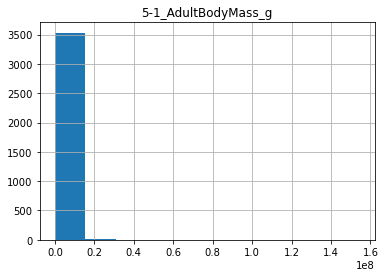

In [19]:
adultBodyMassWnV.hist()


### Histogramme des masses corporelles pour les animaux <= 50 kg

Cette fois en ayant une catégorie de poids plus restreinte l'histogramme devient lisible et il est plus facile de travailler ainsi.

array([[<AxesSubplot:title={'center':'5-1_AdultBodyMass_g'}>]],
      dtype=object)

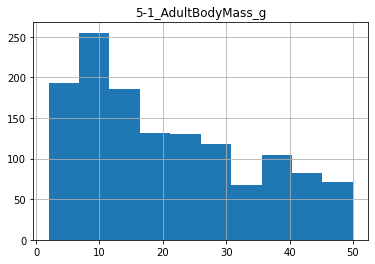

In [20]:
adultBodyMassWnVbis= adultBodyMassWnV[(adultBodyMassWnV["5-1_AdultBodyMass_g"]<=50)]
adultBodyMassWnVbis.hist()